# Modelos de entranamiento

En este cuaderno se expondrá algunos modelos, como se realiza su entrenamiento y nociones basicas de machine learning, esto con el fin de saber seleccionar un modelo adecuado para cada situación, además de que conocer sobre dichos modelos ayuda a solucionar problemas que puedan presentarse durante el entrenamiento.

Muchos de estos modelos se encuentran implementados en **scklearn**, por lo que cuando se busque realiar un modelo no es necesario implementar desde cero los modelos


# Regresión lineal

Este modelo del machine learning realiza prediciones simplemente mediante el producto punto del vector de los pesos($\overrightarrow{\theta}$) por los atributos($\overrightarrow{x}$) así como se muestra en la siguiente ecuación

$$ \hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_{n-1} x_{n-1} + \theta_n x_n $$

- $\hat{y}$ es la predicción.
- $n$ es el numero de atributos.
- $x_i$ es el i-enesimo atributo.
- $\theta_i$ es el i-enesimo peso donde $\theta_0$ es el termino constante, y los demas son los pesos de cada atributo, es decir, que tanto aporta a nuestra predicción dicho atributo.

Todos los modelos de machine learning utilizan funciones conocidas como **funciones de costo** que indican que tan bien o mal está realizando su trabajo el modelo, que dependiendo del tipo de modelo existen varias funciones de costo que pueden utilizarse para este fin, especificamente en regresión lineal se utiliza el **MAE**, el **RMSE** y el **MSE**, aunque debido a que ambas llevan al mismo resultado se prefiere el MSE, ya que resulta más fácil de *minimizar*.

$$MSE(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta x^{(i)}-y^{(i)})^{2}$$

el vector $x^{(i)}$ se ve de la siguiente manera, sin embargo hay que considerar que no necesariamente debe tener 4 entradas

$$ x^{(i)} = \; 
\begin{bmatrix}
      -118.23 \\
      33.91 \\
      1.31 \\
      38.37
\end{bmatrix} 
$$

**Nota:** Con minimizar se refiere a obtener el menor valor posible de dicha función, o desde la vista del calculo encontrar el minimo de la función.

# Ecuación normal

Algunos algoritmos de machine learning cuentan con ecuaciones las cuales permiten encontrar el valor de $\theta$ que minimiza la funcion de costo y da el resultado de manera directa, en el caso de regresión lineal esta ecuación se conoce como **ecuación normal**

$$\hat{\theta} = (X^{T} X) X^{T} y $$

A continuación se muestra su implementación en python

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.rand(100,1)

Primero se crearon algunos dato lineales con algo de ruido, y en la siguiente celda se realizo un grafico de dichos datos

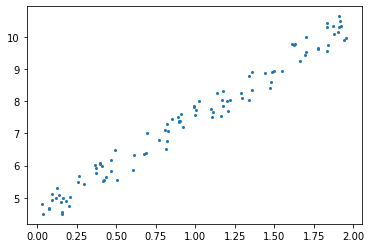

In [4]:
plt.scatter(X,y,s=4)
plt.show()

Antes de utilzar la ecuación se necesita agregar una columna de unos del mismo largo de instacncias en X, esto se realizar en la primera línea de codigo del siguiente bloque, esto es así ya que esta ecuación proviene del problema de minimos cuadrados, donde se tienen ecuaciones del siguiente estilo

$$  y = \theta_0 + \theta_1 x_1  $$

Utilizando los valores de $y$ y $x$, provenientes del vector de soluciones y de atributos respectivamente. Por ejemplo digamos que tenemos un atributo y 3 instancias, siendo las instancias de la forma  $(x,y)$ estas son $(1,5)$, $(2,3)$,$(3,7)$, entonces se obtienen las siguientes 3 ecuaciones  

$$ \theta_0 + \theta_1 = 5   $$
$$ \theta_0 + 2\theta_1 = 3   $$
$$ \theta_0 + 3\theta_1 = 7  $$

Si observamos detenidamente los valores que multiplican a $\theta_0$ son 1 para todos los casos, por lo que como se menciono se debe agregar como se hace en la primer linea, para que pueda funcionar correctamente el algoritmo

In [8]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#### Valores que minimizan la función de costo

In [7]:
theta_best

array([[4.56350524],
       [2.95824988]])

En la siguiente celda se realizan predicciones con el modelo entrenado

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.56350524],
       [10.48000499]])

Con el modelo entrenado, podemos graficar las predicciones hechas por el mismo y observar si es un buen modelo

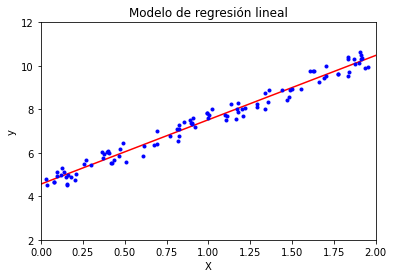

In [22]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.title("Modelo de regresión lineal")
plt.axis([0,2,2,12])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Implementación con sklearn

Como se menciono sklearn es una libreria que tiene varios modelos y herramientas para machine learning, que resultan bastante simples de utilizar, solo es necesario importar aquello que queremos utilizar y entrenar nuestro modelo, para ello se crea un objeto con nuestro modelo, en este caso regresión lineal, y se utiliza el metodo *fit()* que realiza el entrenamiento, el objeto LinearRegression se basa en la ecuación normal, por ello nos entregan los mismo valores

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_,lin_reg.coef_

(array([4.56350524]), array([[2.95824988]]))

In [24]:
lin_reg.predict(X_new)

array([[ 4.56350524],
       [10.48000499]])